<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [39]:
import tensorflow as tf
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
%cd '/content/drive/My Drive/datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/datasets


# Bits of Regression
[Regression ](https://builtin.com/data-science/regression-machine-learning)

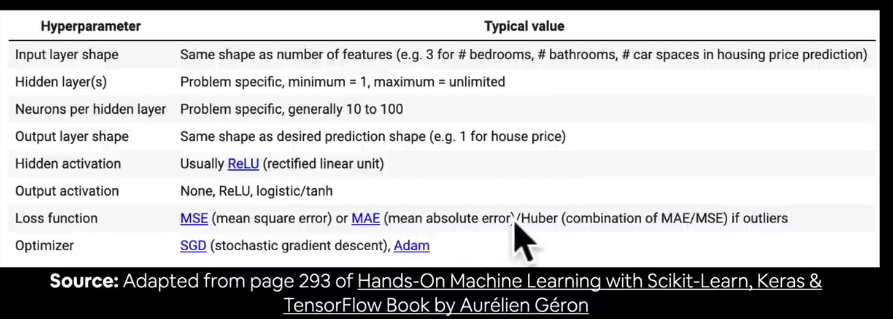
Source : Daniel Bourke deep learning fundamentals video.

Inputs/covariates/features/independent variables -> Details of related item for which we have to apply the model to predict , in case of house price prediction input is details of house

Outputs/dependent variables -> Predicted price

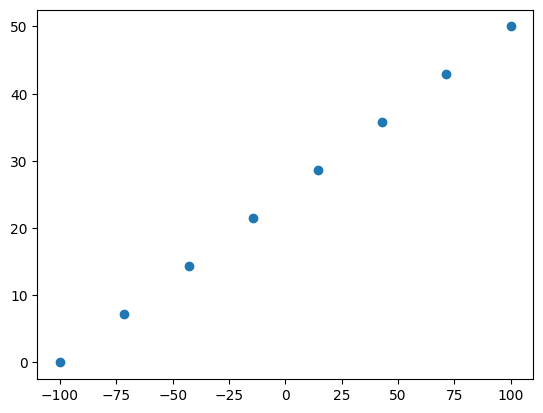

In [40]:
#  print(tf.__version__)
x = np.linspace(-100, 100, num = 8)  # create features
y = np.linspace(0,50,8) # labels
plt.scatter(x,y) # plotting

Applying the regression

In [41]:
y > x/ 2 - 1 # this shows the inequality

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [42]:
tensor_x = tf.constant(x)
tensor_y = tf.constant(y)
tensor_x, tensor_y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=
 array([-100.        ,  -71.42857143,  -42.85714286,  -14.28571429,
          14.28571429,   42.85714286,   71.42857143,  100.        ])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=
 array([ 0.        ,  7.14285714, 14.28571429, 21.42857143, 28.57142857,
        35.71428571, 42.85714286, 50.        ])>)

### Steps in modelling with tf
* Creating a model : define the input and output layers , as well as hidden layers of a deep learning model.
* Compiling a model : define the loss function ( in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns of its learning) and evaluation metrics(what we can use to interpret the performance of our model).
* Fitting a model : letting the model try to find patterns between x and y, features and labels.

In [43]:
tf.random.set_seed(50)
# building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.MAE
)

# fitting the model or letting the model learn about patterns are get ready for prediction
model.fit(
    tf.expand_dims(tensor_x, axis = -1),
    tensor_y,
    epochs = 8
)

model.predict([100, 75])

Epoch 1/8
1/1 [==============================] - 2s 2s/step - loss: 29.7315 - mean_absolute_error: 29.7315
Epoch 2/8
1/1 [==============================] - 0s 19ms/step - loss: 24.9950 - mean_absolute_error: 24.9950
Epoch 3/8
1/1 [==============================] - 0s 21ms/step - loss: 24.9850 - mean_absolute_error: 24.9850
Epoch 4/8
1/1 [==============================] - 0s 23ms/step - loss: 24.9750 - mean_absolute_error: 24.9750
Epoch 5/8
1/1 [==============================] - 0s 35ms/step - loss: 24.9650 - mean_absolute_error: 24.9650
Epoch 6/8
1/1 [==============================] - 0s 25ms/step - loss: 24.9550 - mean_absolute_error: 24.9550
Epoch 7/8
1/1 [==============================] - 0s 21ms/step - loss: 24.9450 - mean_absolute_error: 24.9450
Epoch 8/8
1/1 [==============================] - 0s 300ms/step


array([[22.424587],
       [16.83719 ]], dtype=float32)

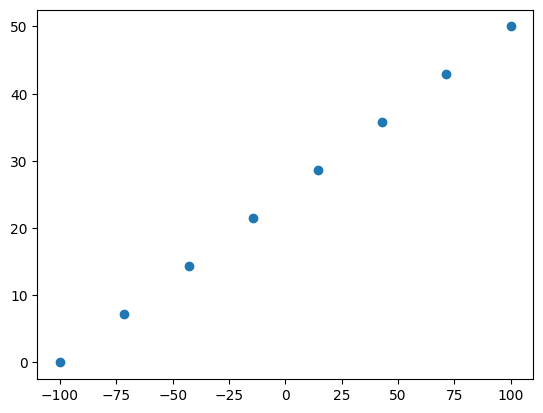

In [44]:
plt.scatter(
    tensor_x,
    tensor_y
)

In [45]:
model.predict([100, 75]) # not at all accurate as for 100 the value should be around 50 and for 75 it should be around 35

1/1 [==============================] - 0s 90ms/step


array([[22.424587],
       [16.83719 ]], dtype=float32)

### Training and Testing on larger data

[-100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5  -80.   -77.5
  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5  -55.   -52.5
  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5  -30.   -27.5
  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5   -5.    -2.5
    0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5] 
 [-80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5 -60.  -57.5 -55.  -52.5
 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5 -30.  -27.5 -25.  -22.5
 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5   0.    2.5   5.    7.5
  10.   12.5  15.   17.5  20.   22.5  25.   27.5  30.   32.5  35.   37.5
  40.   42.5  45.   47.5  50.   52.5  55.   57.5  60.   62.5  65.   67.5
  70.   72.5  75.   77.5  80.   82.5  85.   87.5  90.   92.5  95

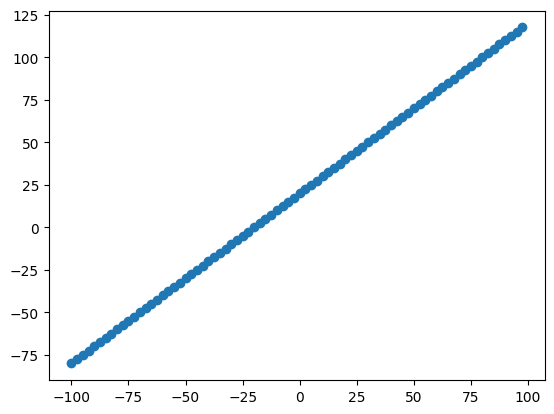

In [46]:
tensor_x = np.arange(-100, 100, 2.5)  # this is for creating array in range with some difference
tensor_y = np.arange(-80,120,2.5)
print(tensor_x, '\n', tensor_y)
plt.scatter(
    tensor_x,
    tensor_y
)

The equation should be something like this
y = x + 20

Splitting the dataset into training and testing

In [47]:
len(tensor_x)

80

In [48]:
# shuffling the data
indices = np.arange(len(tensor_x))
np.random.shuffle(indices)
# assigning the shuffled indexes to both the arrays
tensor_x = tensor_x[indices]
tensor_y = tensor_y[indices]

train_size = 63
x_train = tensor_x[:train_size]
y_train = tensor_y[:train_size]

x_test = tensor_x[train_size:]
y_test = tensor_y[train_size:]

len(x_train), len(y_train)

(63, 63)

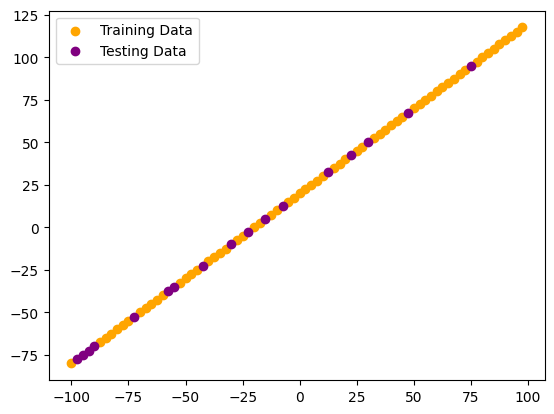

In [49]:
plt.scatter(x_train, y_train, c = 'orange',  label = 'Training Data')
plt.scatter(x_test, y_test, c = 'purple', label = 'Testing Data')
plt.legend()

In [88]:
tf.random.set_seed(40)

# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]),  # Dense(# no_of_neurons, input_shape)
    tf.keras.layers.Dense(1, input_shape = [1]) # adding one more layer
])

# compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.MAE
)
# Model summary
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 22ms/step


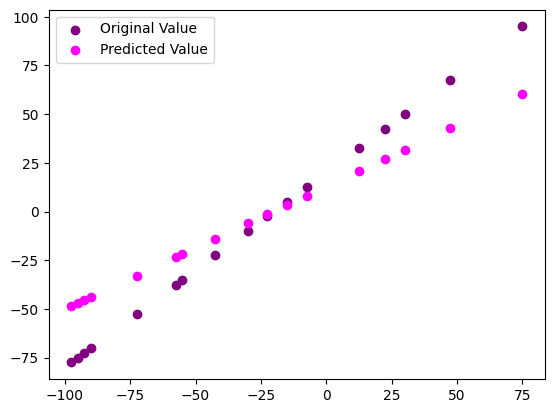

In [98]:
model.fit(x_train, y_train, epochs = 30, verbose = 0) # training the model
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test, c = 'purple', label =  'Original Value' )
plt.scatter(x_test, y_pred, c = 'magenta', label =  'Predicted Value')
plt.legend()

Plotting the model

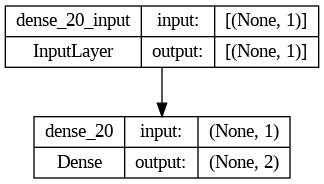

In [75]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

#### Evaluating Predictions

In [85]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 251ms/step - loss: 25.1023 - mean_absolute_error: 25.1023


[25.10226058959961, 25.10226058959961]

In [87]:
# calculating mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true = y_test,
    y_pred = y_pred
)
mae

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([100.02574 , 103.08751 ,  60.815266,  46.872536,  44.235058,
        52.92521 ,  59.002594,  45.20846 , 106.14929 ,  49.516766,
        62.436207,  54.559696, 102.259995, 109.21108 ,  78.593315,
        73.47823 ,  43.952312], dtype=float32)>